<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

SONG = 3
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

16:23:51 INFO << load arm CSV.
16:23:51 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 2, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 2, 2)) 
            
    return pfs

In [5]:
pfs = []
for drumer in range(1, 8 + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [00:55<00:00, 18.61s/it]


16:34:49 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
16:34:49 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


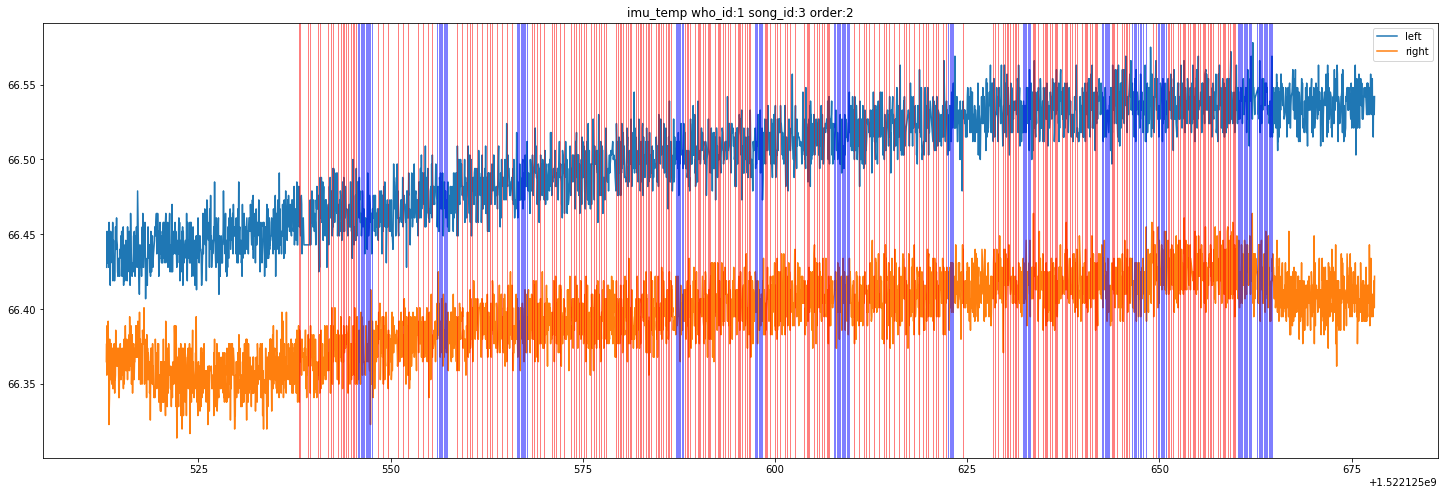

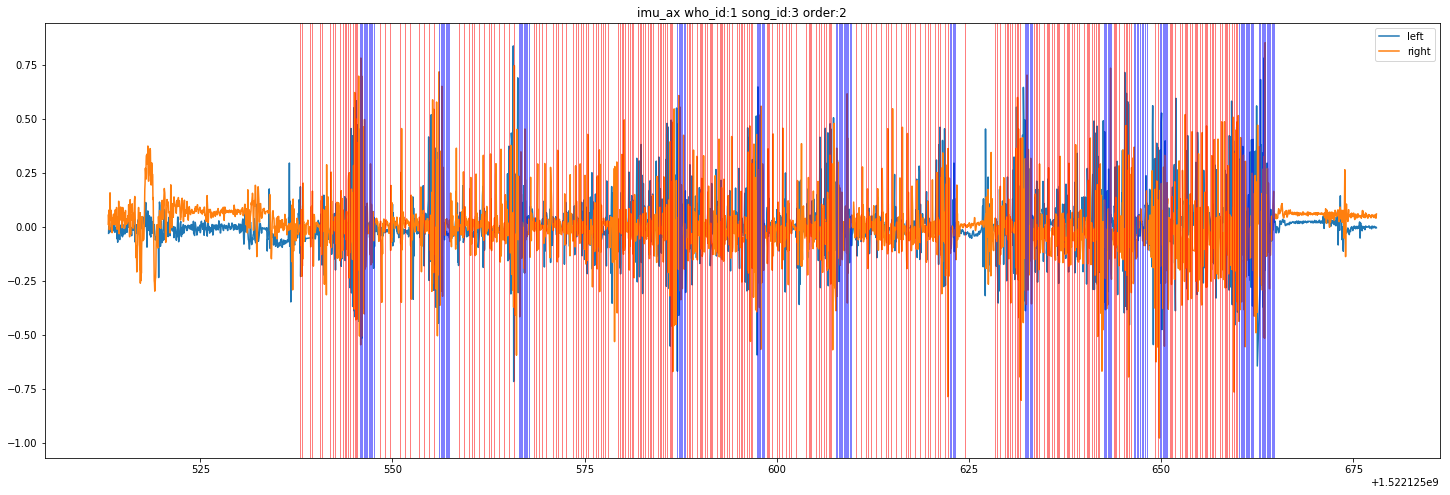

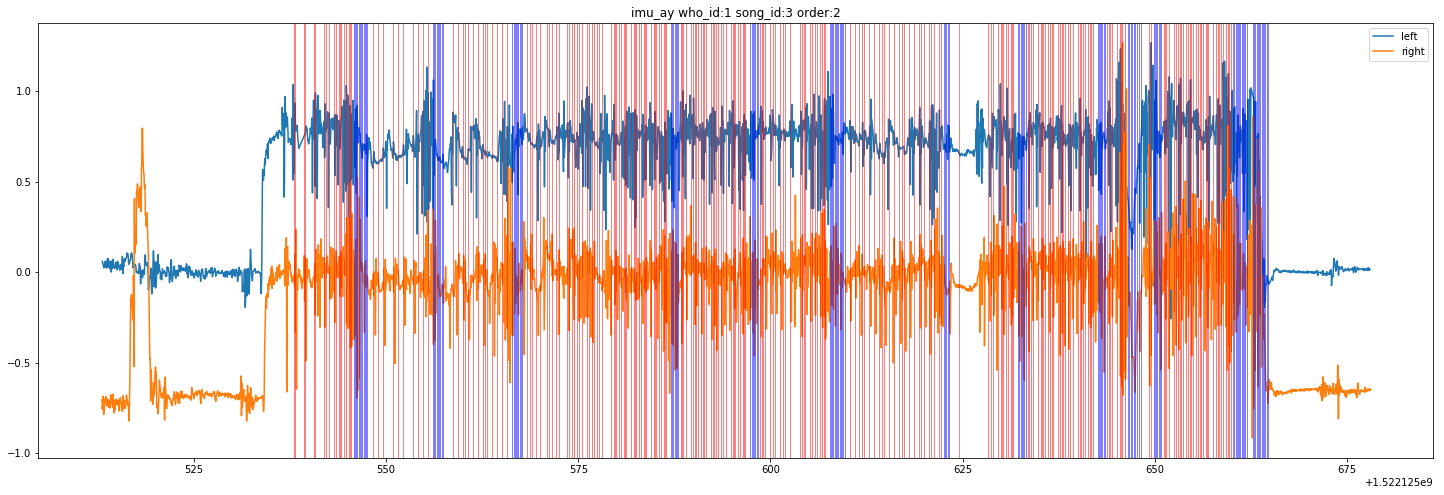

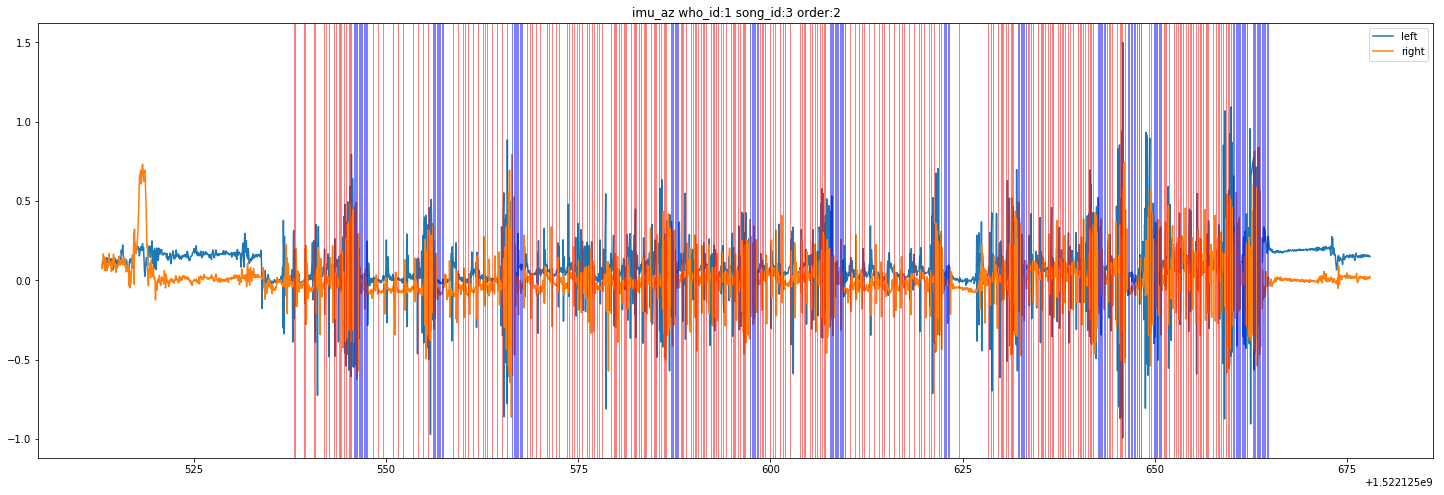

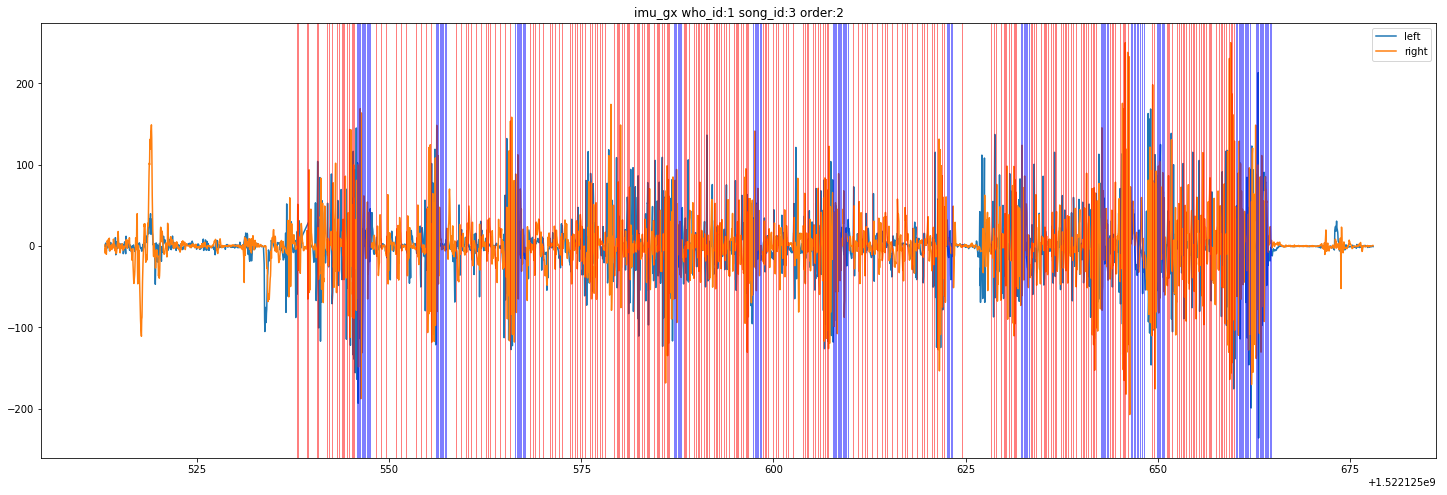

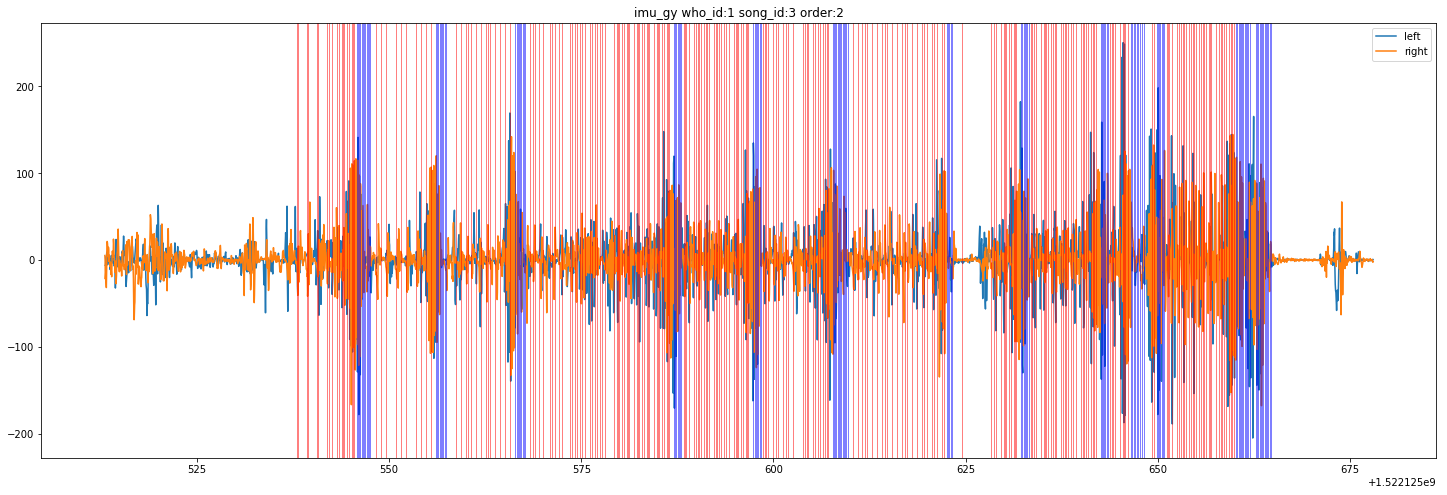

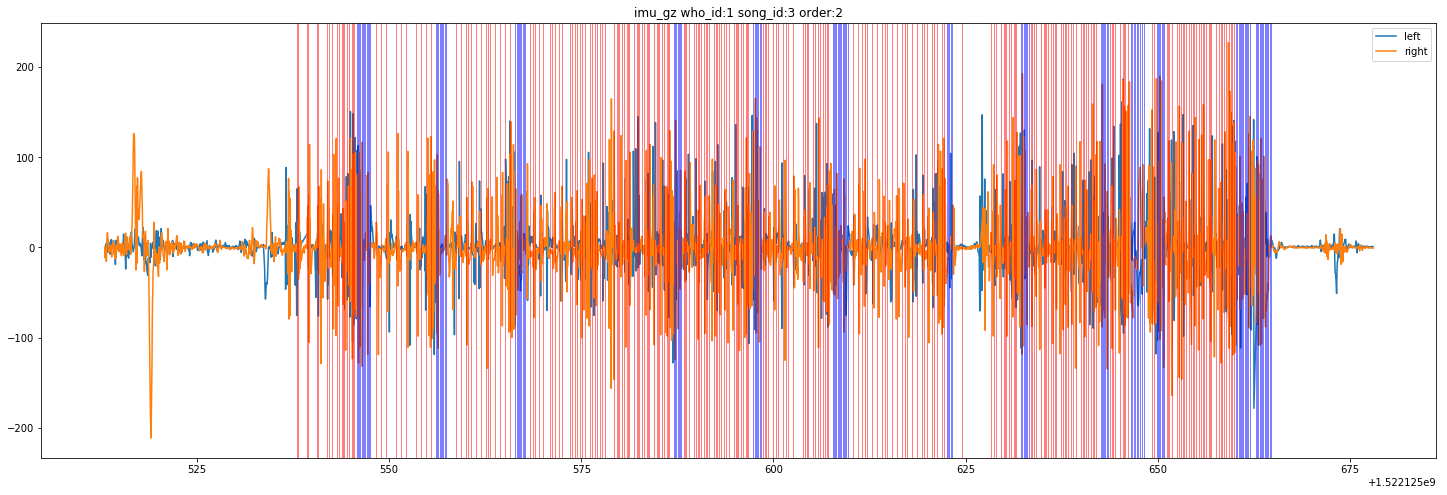

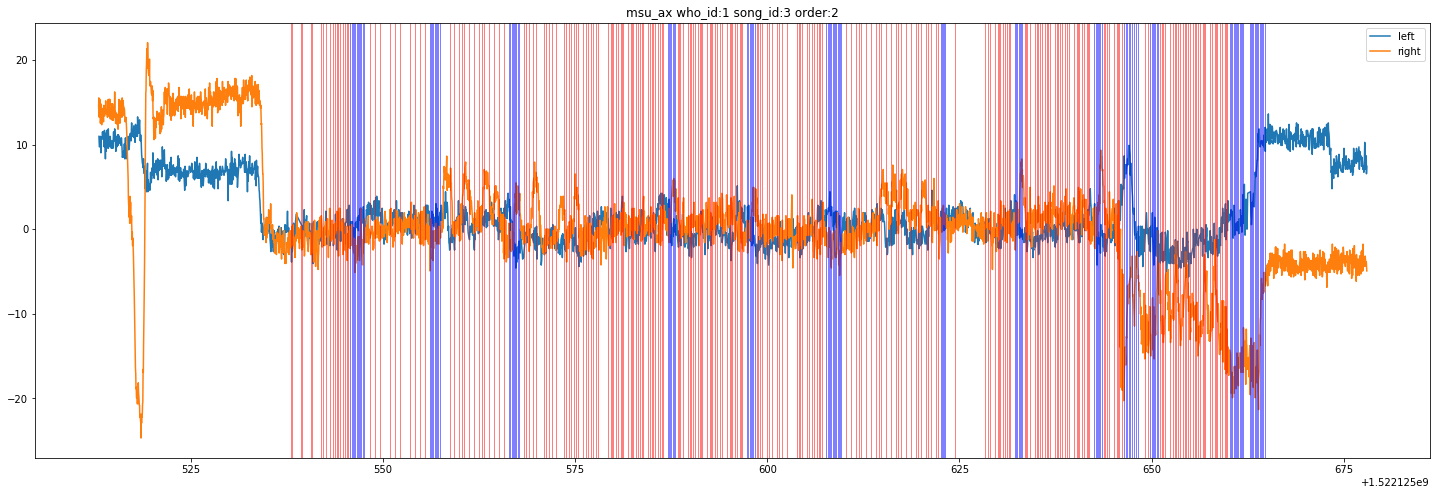

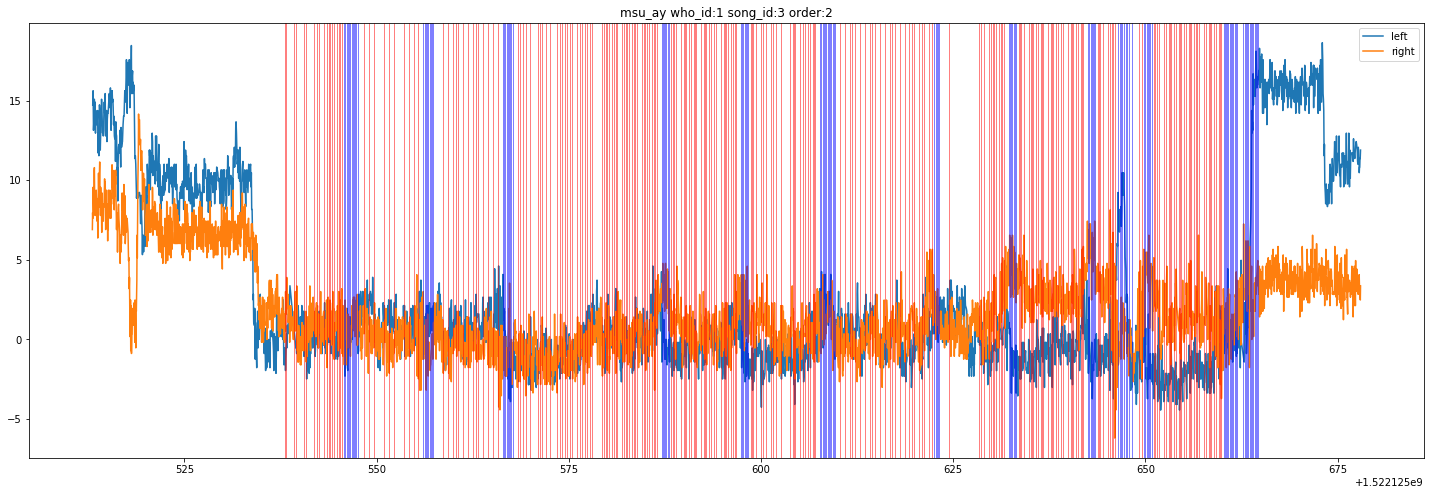

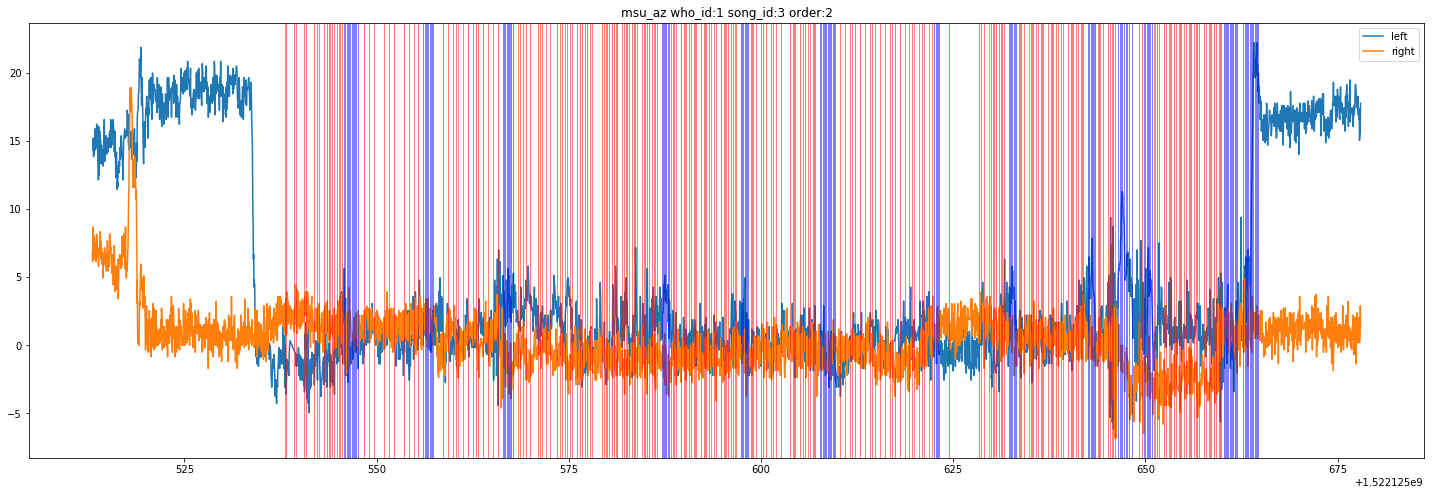

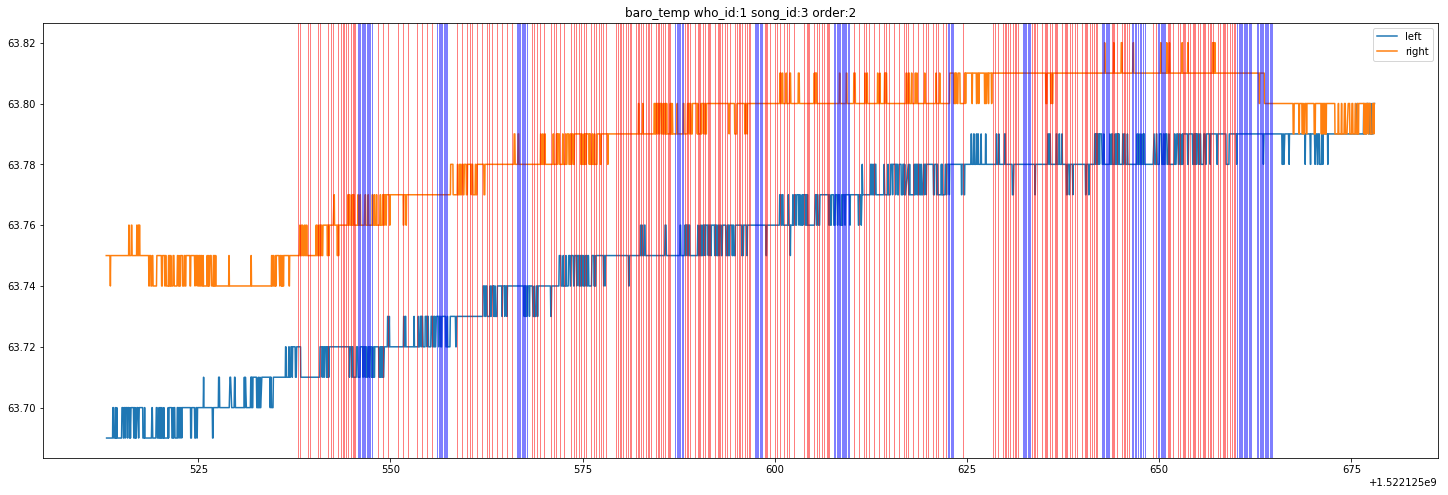

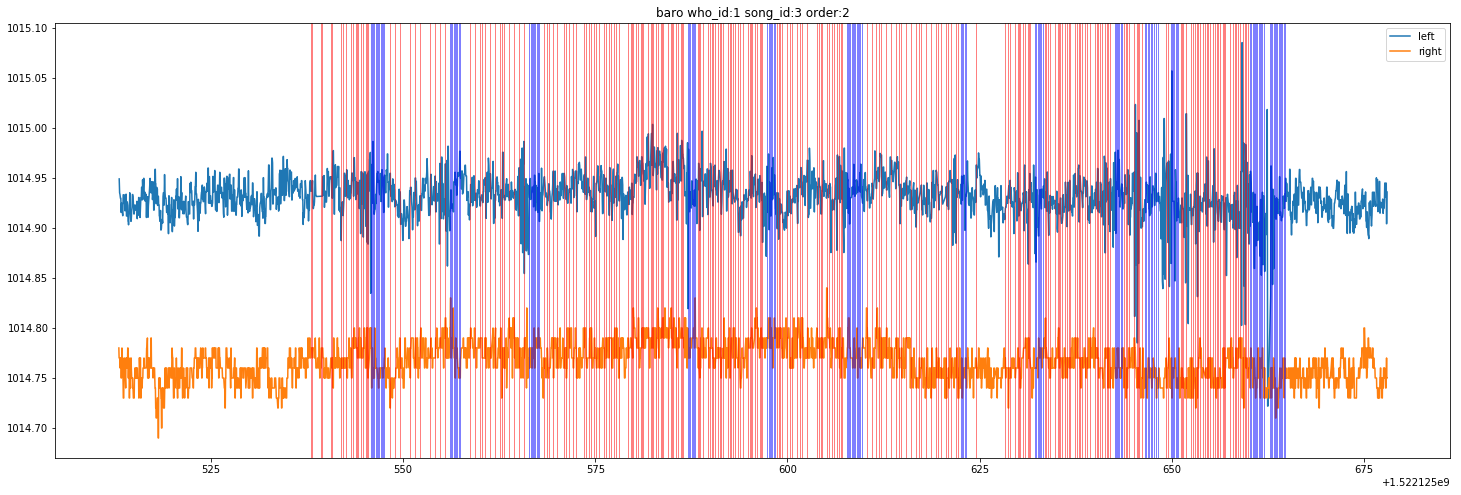

In [6]:
pfs[0][1].plot_global_event()

In [7]:
pfs[0][1].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.126785,0.000235,0.179400,7.455974,3.389308,11.429800,0.016310,58.980854,0.132442,6.805588,...,0.333333,0.555556,0.333333,0.444444,-0.823027,-0.132693,0.046999,0.803431,0.745050,0.909259
1,0.140810,0.000010,0.187000,5.479284,5.906328,7.835429,0.019838,35.928886,0.141958,6.125671,...,0.333333,0.333333,0.333333,0.333333,-0.664169,-0.448275,-0.078581,0.590184,0.696314,0.151542
2,0.131820,0.000090,0.186875,8.141378,8.920398,11.704000,0.017467,75.202429,0.130439,7.956589,...,0.333333,0.333333,0.333333,0.222222,-0.901459,-0.180545,0.225218,0.151628,0.556065,0.591530
3,0.137606,0.000086,0.189778,5.377964,4.456724,7.769222,0.019021,33.379223,0.137233,4.708800,...,0.300000,0.300000,0.300000,0.400000,-0.629549,-0.207038,-0.342590,0.813753,0.535715,0.232637
4,0.132227,0.000269,0.200667,15.578351,157.031989,23.704833,0.017753,399.717003,0.138288,8.780357,...,0.375000,0.500000,0.375000,0.500000,-0.641561,-0.135536,0.474298,0.751936,0.480254,0.162760
5,0.127068,0.000107,0.172429,6.001040,10.624633,8.807143,0.016253,46.637112,0.126641,3.987093,...,0.333333,0.222222,0.222222,0.222222,-0.675371,0.081957,-0.069747,0.846970,0.892119,0.776028
6,0.129094,0.000173,0.182000,5.111948,2.956039,7.921000,0.016838,29.088051,0.130553,5.800956,...,0.300000,0.500000,0.300000,0.600000,-0.300063,-0.526104,0.367002,0.157846,0.134697,-0.095605
7,0.145910,0.000457,0.188000,14.588621,79.222318,21.520286,0.021747,292.050167,0.141880,10.623595,...,0.444444,0.444444,0.111111,0.555556,-0.757373,-0.672014,0.745340,0.609905,0.875648,0.271280
8,0.175317,0.000810,0.224000,20.156511,84.288411,29.414857,0.031546,490.573361,0.168935,18.608174,...,0.400000,0.400000,0.200000,0.400000,-0.919875,-0.618694,0.676948,0.671413,0.892257,0.504925
9,0.137979,0.000143,0.207167,10.486841,26.321032,15.716667,0.019182,136.294870,0.137428,10.015065,...,0.200000,0.400000,0.200000,0.200000,-0.156787,-0.254940,-0.538113,0.905805,0.301065,0.505675


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

!!!!!!!!! test 1-th drumer !!!!!!!!!!!!
[[ 1.70968614 -0.58888478  1.36257667 ...  1.16630414 -0.54788662
   1.44809689]
 [ 1.72410005 -0.59040965  1.38623825 ...  0.212156   -1.0249498
  -0.92032219]
 [ 1.81474476 -0.57751838  1.51894341 ...  0.8649862   0.48053551
  -0.30118042]
 ...
 [ 0.70149688 -0.58973619  0.49786479 ...  1.25755901 -1.90556529
  -1.15603899]
 [ 0.6685902  -0.58300806  0.48133925 ... -0.94619926  1.00985673
  -1.43349269]
 [ 0.61112765 -0.58299564  0.55946002 ...  1.11637587 -0.51999226
  -1.13807235]]


100%|██████████| 792/792 [01:15<00:00, 10.44it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:14<00:00, 10.58it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.79150579 0.20849421]
 [0.64102564 0.35897436]]


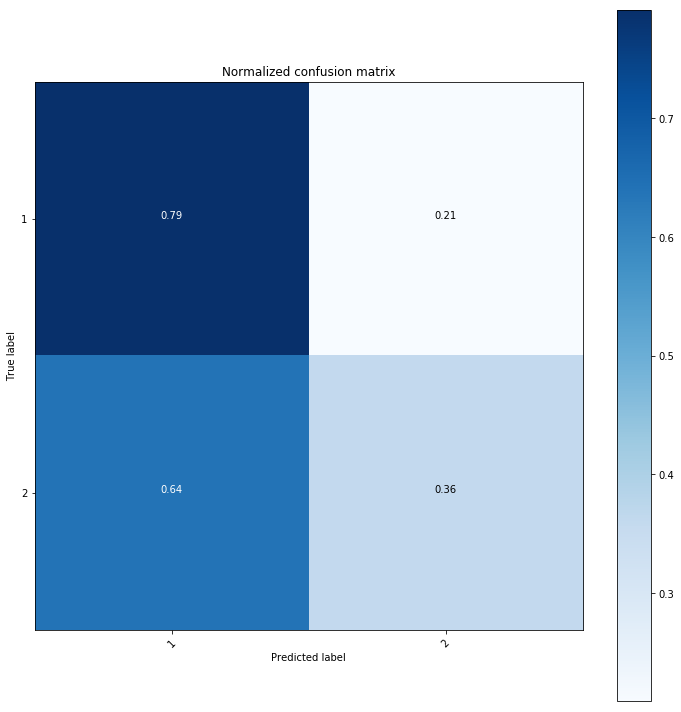

predicting 2 performance


100%|██████████| 792/792 [01:14<00:00, 10.65it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.69498069 0.30501931]
 [0.38461538 0.61538462]]


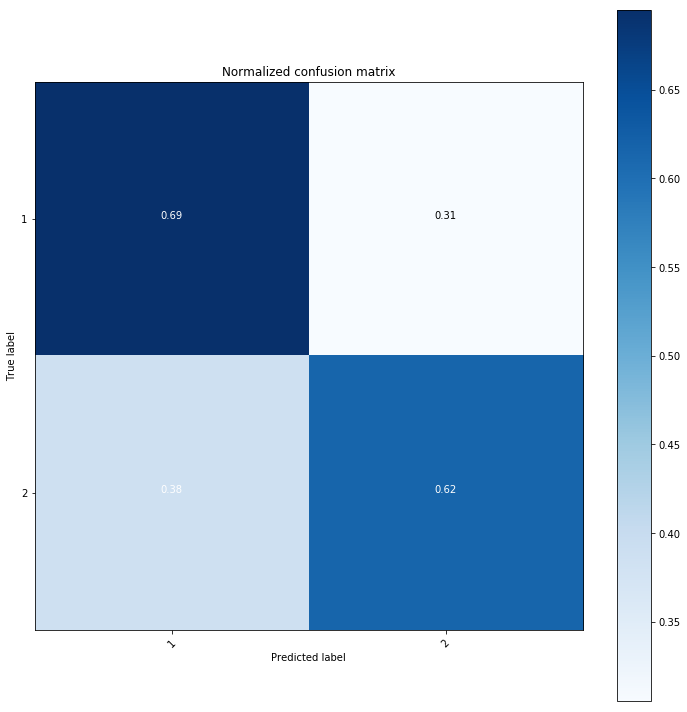

predicting 3 performance


100%|██████████| 792/792 [01:14<00:00, 10.64it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97297297 0.02702703]
 [0.1025641  0.8974359 ]]


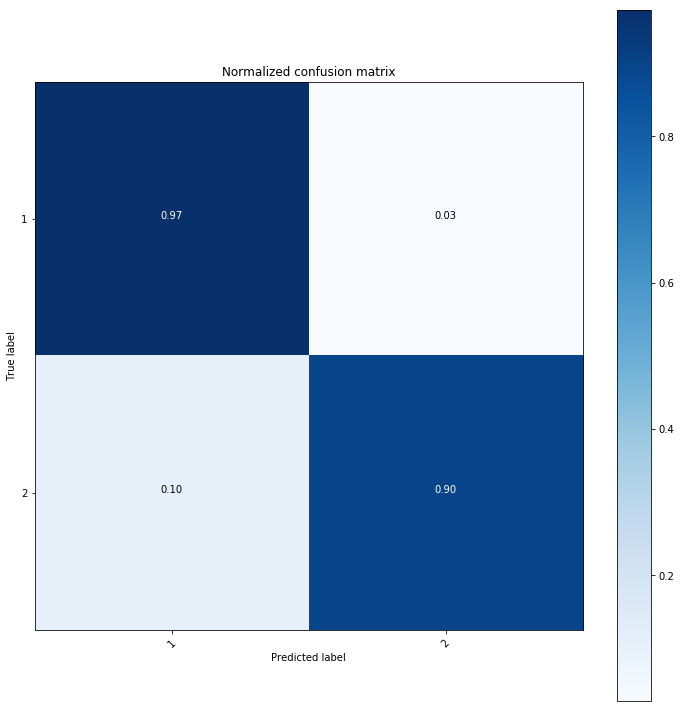

!!!!!!!!! test 2-th drumer !!!!!!!!!!!!
[[ 1.86173787 -0.29530374  1.89193102 ...  0.61168973 -0.52183593
  -1.26565709]
 [ 1.82658678 -0.29603318  1.87320855 ...  1.27814305 -1.43295677
  -2.49037776]
 [ 1.79659907 -0.29422141  1.86645584 ... -0.46940965 -0.69416124
   0.6324823 ]
 ...
 [ 0.60305015 -0.28647672  0.32757174 ...  0.89197188 -0.67287509
  -2.73098763]
 [ 0.59556012 -0.28639428  0.29779476 ...  0.9663025  -0.40175856
  -2.53841453]
 [ 0.56397298 -0.27567271  0.4527815  ...  1.74020565 -1.33457996
  -3.0807686 ]]


100%|██████████| 792/792 [01:12<00:00, 10.85it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:13<00:00, 10.83it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.05019305 0.94980695]
 [0.08547009 0.91452991]]


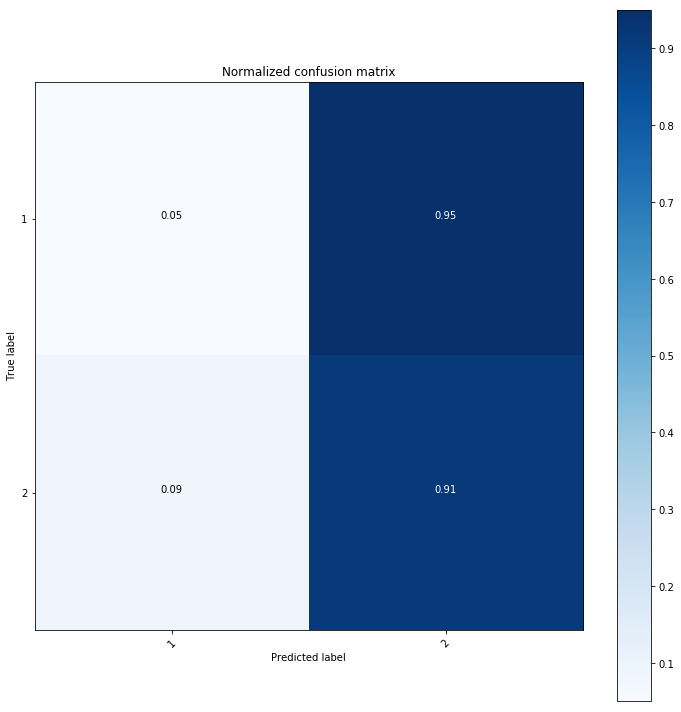

predicting 2 performance


100%|██████████| 792/792 [01:13<00:00, 10.82it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.80694981 0.19305019]
 [0.45299145 0.54700855]]


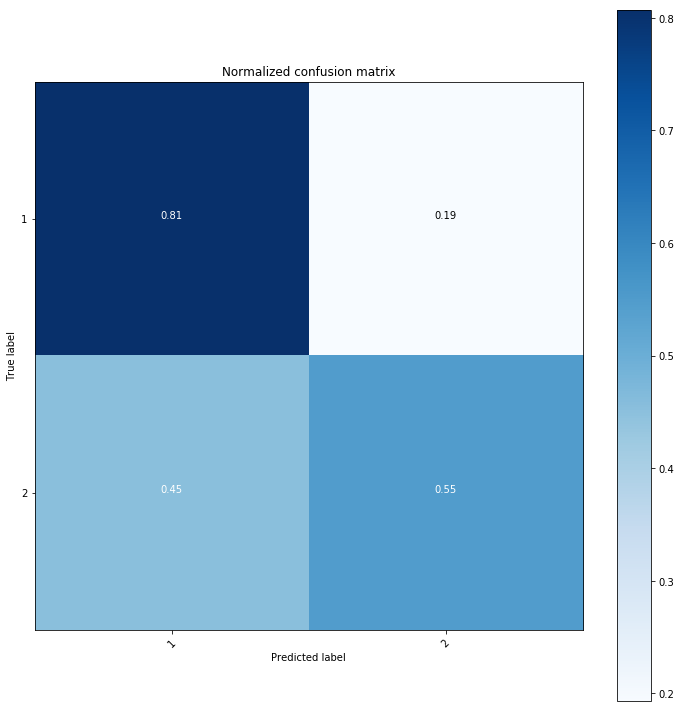

predicting 3 performance


100%|██████████| 792/792 [01:13<00:00, 10.79it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98455598 0.01544402]
 [0.1025641  0.8974359 ]]


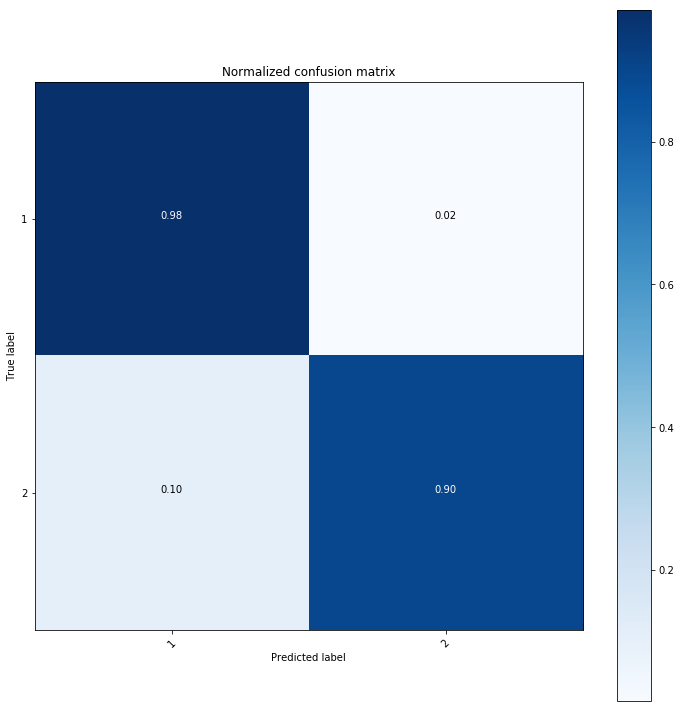

!!!!!!!!! test 3-th drumer !!!!!!!!!!!!
[[ 2.29304365 -0.45007872  2.3264575  ... -0.6597069  -0.42784278
  -1.5600902 ]
 [ 2.29402806 -0.44976227  2.32681106 ... -0.33433734  0.3049076
  -2.11742572]
 [ 2.28548337 -0.4500015   2.31506588 ...  0.69644562 -1.50630349
  -1.97183147]
 ...
 [ 1.2115926  -0.33985542  1.12628489 ... -1.16070718 -0.89987836
  -0.20979166]
 [ 0.75346454 -0.24008523  0.56098865 ...  1.54051446  0.35919838
   0.45621058]
 [ 1.23167219 -0.43885739  0.97621482 ...  1.95887272  0.86455895
   0.70983669]]


100%|██████████| 792/792 [01:15<00:00, 10.53it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:14<00:00, 10.57it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.7027027  0.2972973 ]
 [0.55555556 0.44444444]]


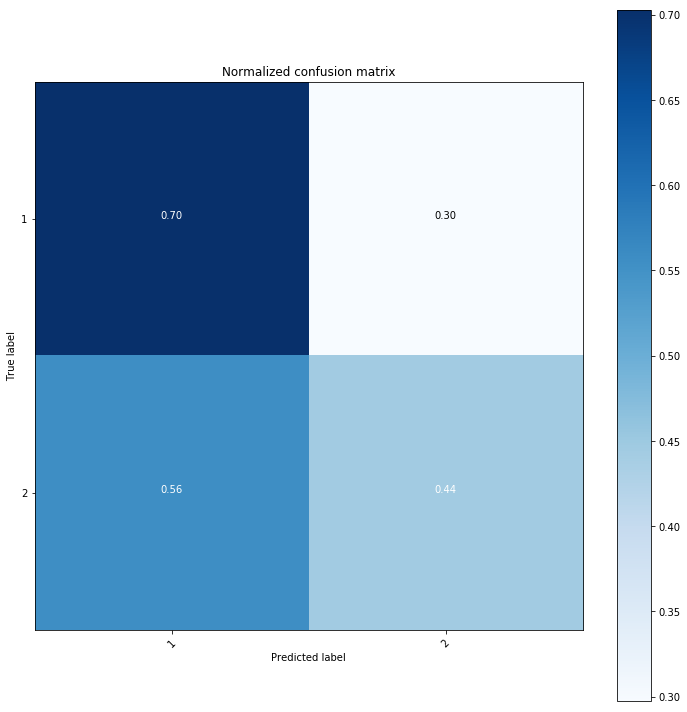

predicting 2 performance


100%|██████████| 792/792 [01:14<00:00, 10.60it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.6023166  0.3976834 ]
 [0.41880342 0.58119658]]


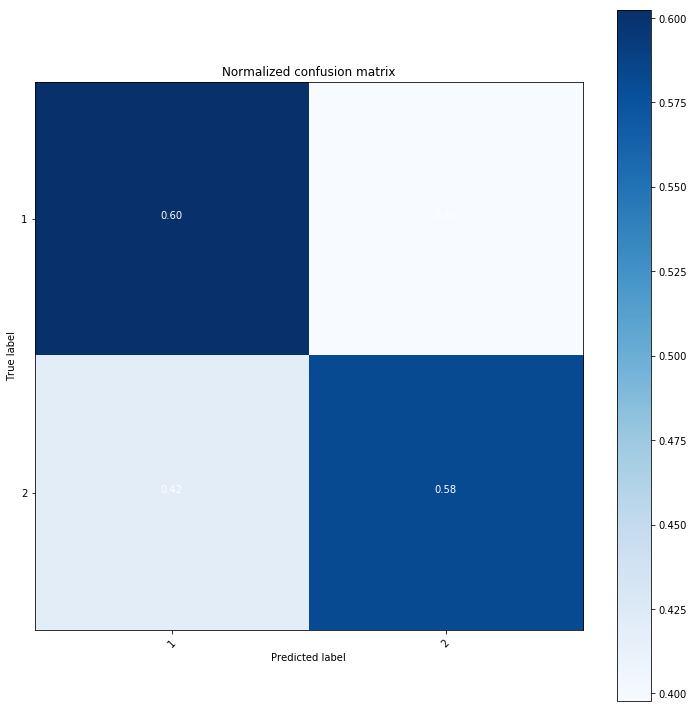

predicting 3 performance


100%|██████████| 792/792 [01:15<00:00, 10.52it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.996139   0.003861  ]
 [0.05128205 0.94871795]]


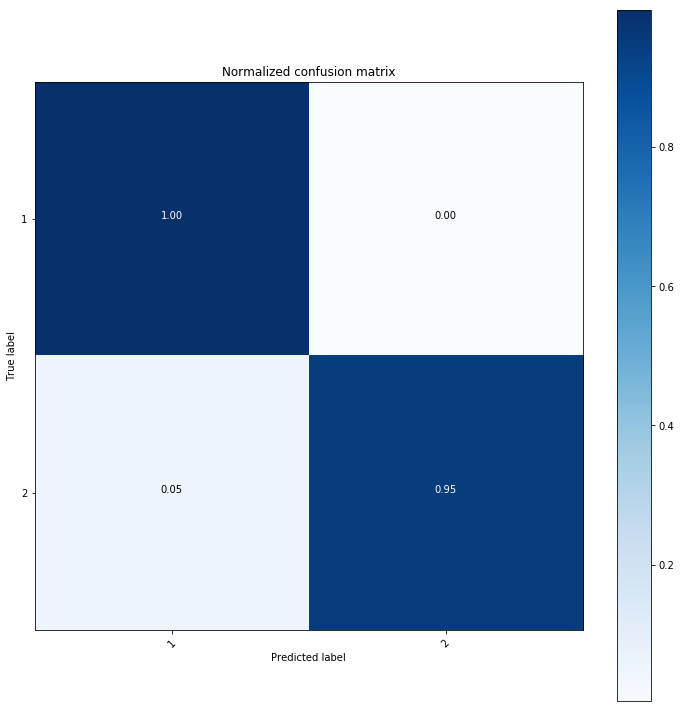

!!!!!!!!! test 4-th drumer !!!!!!!!!!!!
[[-0.70701869 -0.57522656 -0.72715669 ...  0.05280512  0.17330374
  -1.48858506]
 [-0.47489722 -0.54756262 -0.52295954 ...  1.16535767 -1.80766566
  -1.97550807]
 [-0.09214058 -0.53772962 -0.16733268 ... -0.79577926 -0.00846336
  -1.16654078]
 ...
 [-0.70243183 -0.60132972 -0.82006756 ... -0.08022867 -1.97939272
  -0.43383229]
 [-0.2619658  -0.39966243 -0.23390351 ...  1.46816208 -2.59861906
  -2.22965316]
 [ 0.65208312 -0.33053821  0.68096495 ... -1.15073135  1.15481304
  -1.36192619]]


100%|██████████| 792/792 [01:14<00:00, 10.61it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 792/792 [01:12<00:00, 10.89it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.9034749  0.0965251 ]
 [0.42735043 0.57264957]]


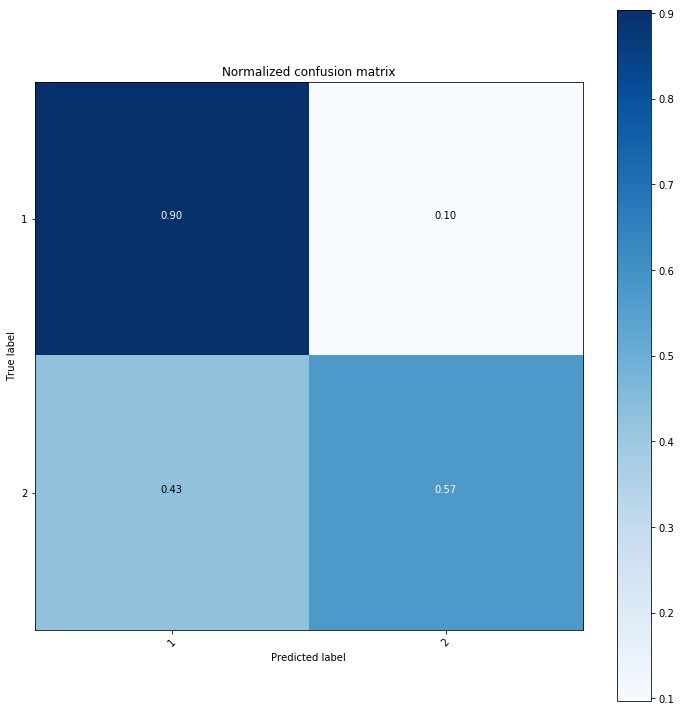

predicting 2 performance


100%|██████████| 792/792 [01:13<00:00, 10.82it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.81853282 0.18146718]
 [0.41880342 0.58119658]]


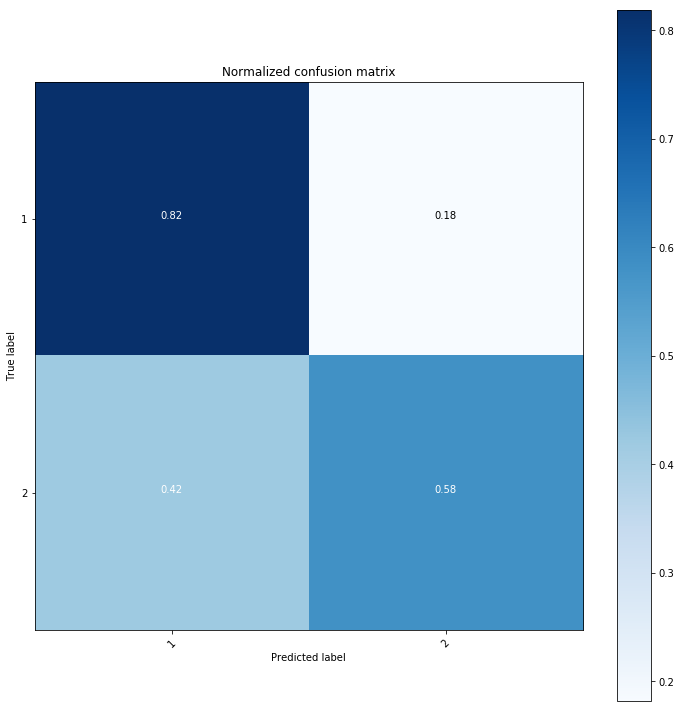

predicting 3 performance


100%|██████████| 792/792 [01:12<00:00, 10.89it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98455598 0.01544402]
 [0.03418803 0.96581197]]


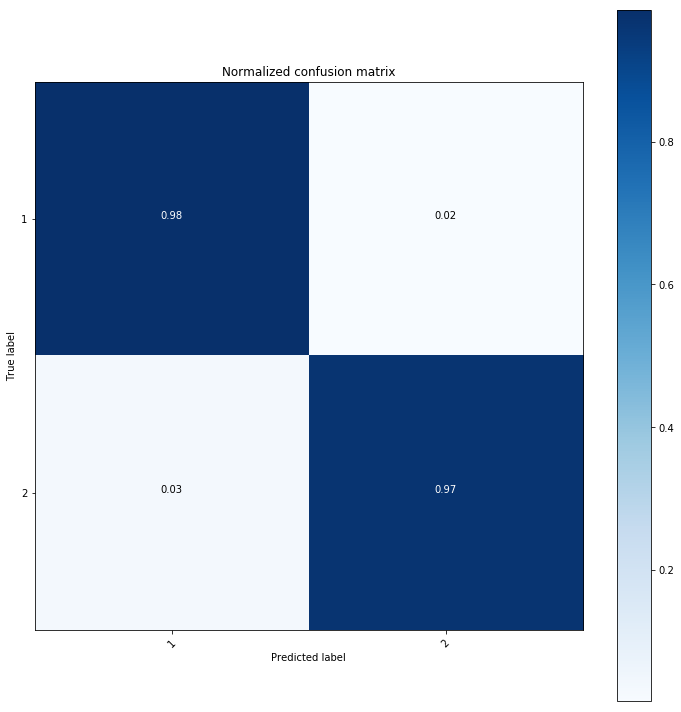

!!!!!!!!! test 5-th drumer !!!!!!!!!!!!
[[-0.73282743 -0.69348466 -0.76926504 ...  0.46807389  0.3033527
  -1.45307745]
 [-0.39138359 -0.49426105 -0.47996744 ...  1.46402528  1.62217013
   0.50979933]
 [ 0.14331406 -0.07215865  0.04094129 ... -0.61221829  1.12268388
  -0.72437538]
 ...
 [ 4.00122598 -0.49801865  3.78536937 ...  1.32347474  0.06235704
  -0.94433095]
 [ 2.30141762  5.65604869  1.98728243 ... -0.49846516 -0.44187085
   1.32808202]
 [-0.04532706 -0.60583262 -0.031311   ...  1.90240769  0.87537674
   0.69840322]]


100%|██████████| 792/792 [01:11<00:00, 11.10it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 792/792 [01:11<00:00, 11.11it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.91505792 0.08494208]
 [0.5982906  0.4017094 ]]


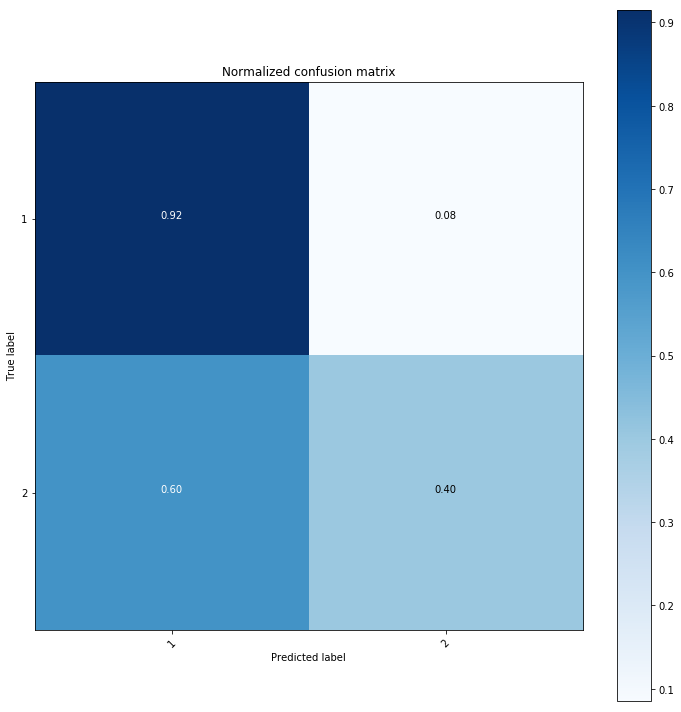

predicting 2 performance


100%|██████████| 792/792 [01:11<00:00, 11.11it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.8957529  0.1042471 ]
 [0.44444444 0.55555556]]


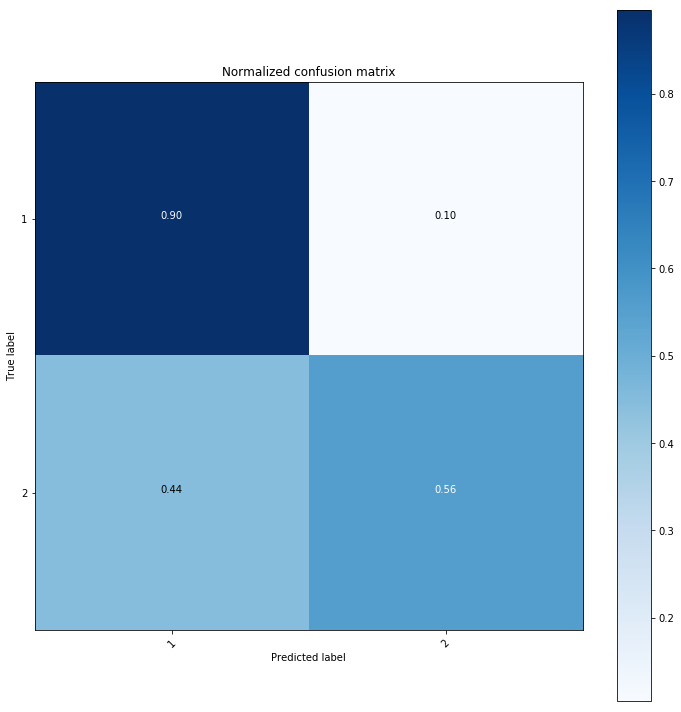

predicting 3 performance


100%|██████████| 792/792 [01:11<00:00, 11.12it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.96525097 0.03474903]
 [0.1025641  0.8974359 ]]


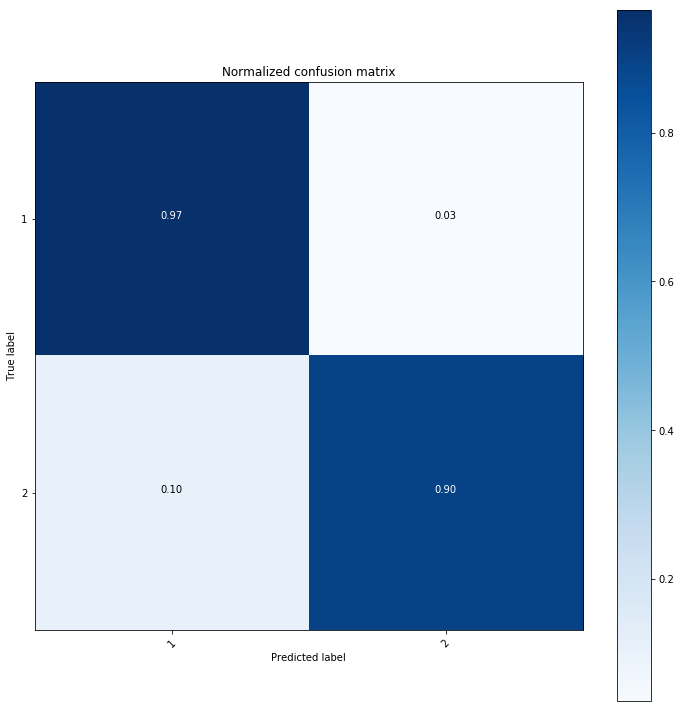

!!!!!!!!! test 6-th drumer !!!!!!!!!!!!
[[-0.1005756  -0.4642205  -0.05179093 ...  0.00993104 -0.04358361
   1.00580957]
 [-0.13626662 -0.42330581 -0.03266589 ... -0.71671987  0.85451686
   0.03225332]
 [-0.11317087 -0.38343702 -0.06669721 ...  0.80912952  0.81645793
  -1.60263083]
 ...
 [-0.11233012 -0.53273357 -0.01039084 ...  0.65213965  1.34435955
  -0.73868642]
 [ 0.04482779 -0.53200654  0.19812837 ... -0.25938043 -0.08879171
   0.54476145]
 [ 0.09491473 -0.52275742  0.23254641 ...  1.21315362  1.46330217
   0.59405971]]


100%|██████████| 792/792 [01:11<00:00, 11.10it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 792/792 [01:10<00:00, 11.17it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.81081081 0.18918919]
 [0.58119658 0.41880342]]


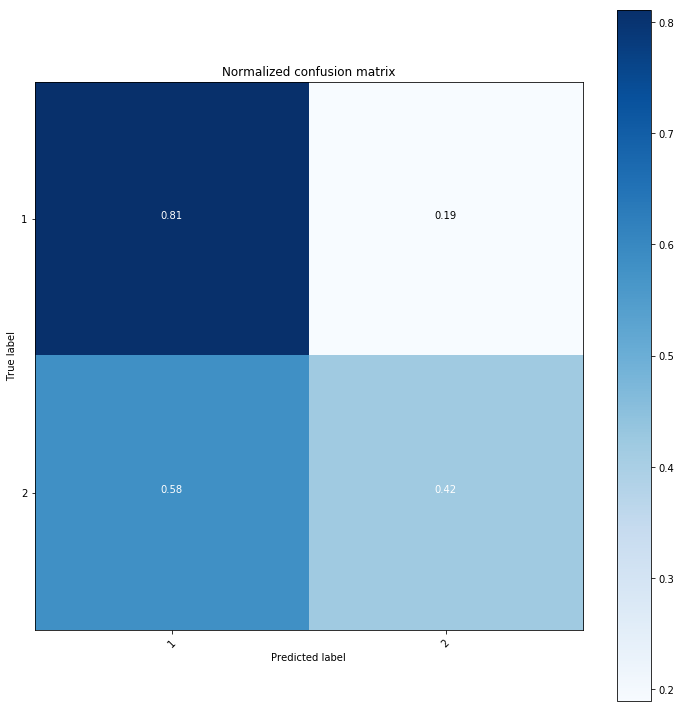

predicting 2 performance


100%|██████████| 792/792 [01:10<00:00, 11.16it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.85328185 0.14671815]
 [0.47008547 0.52991453]]


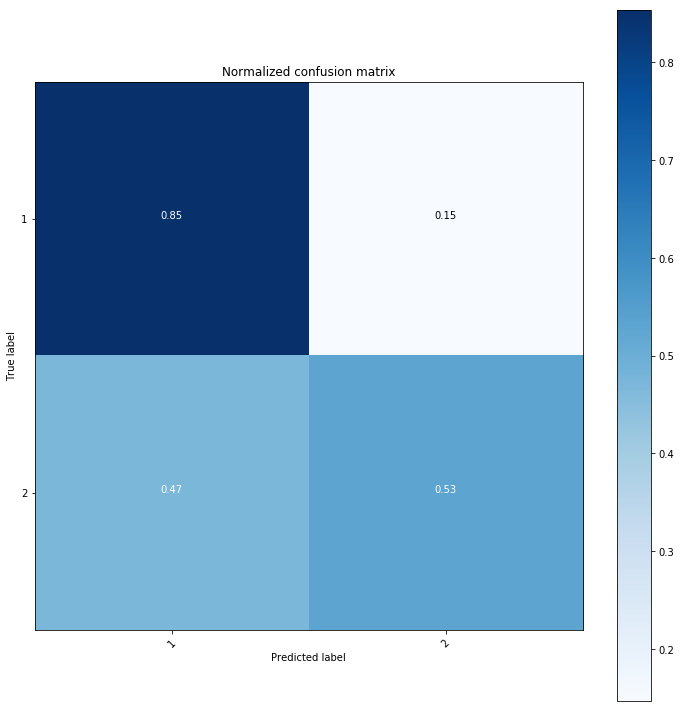

predicting 3 performance


100%|██████████| 792/792 [01:11<00:00, 11.11it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98841699 0.01158301]
 [0.04273504 0.95726496]]


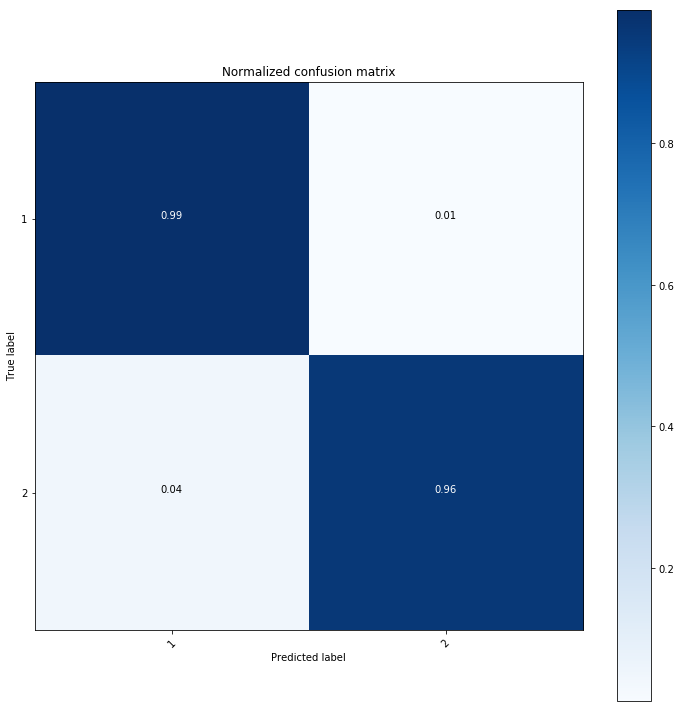

!!!!!!!!! test 7-th drumer !!!!!!!!!!!!
[[-0.04674358 -0.69596512 -0.3625776  ...  1.55726083  0.77077125
   1.13259423]
 [-0.2328945  -0.69415674 -0.50577337 ...  2.2605977   1.7271523
   1.12670208]
 [-0.18781556 -0.69688892 -0.51564635 ... -1.18708907 -0.1220758
  -0.58583288]
 ...
 [-0.48050521 -0.69281045 -0.368654   ... -0.33412003  0.167558
   0.67902445]
 [-0.70988625 -0.68955249 -0.66894119 ...  1.5089633   1.22810326
   0.79571523]
 [-0.55765887 -0.69246276 -0.45801005 ... -1.54587072 -1.60798851
   1.06954372]]


100%|██████████| 792/792 [01:11<00:00, 11.13it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 792/792 [01:11<00:00, 11.13it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.996139   0.003861  ]
 [0.96581197 0.03418803]]


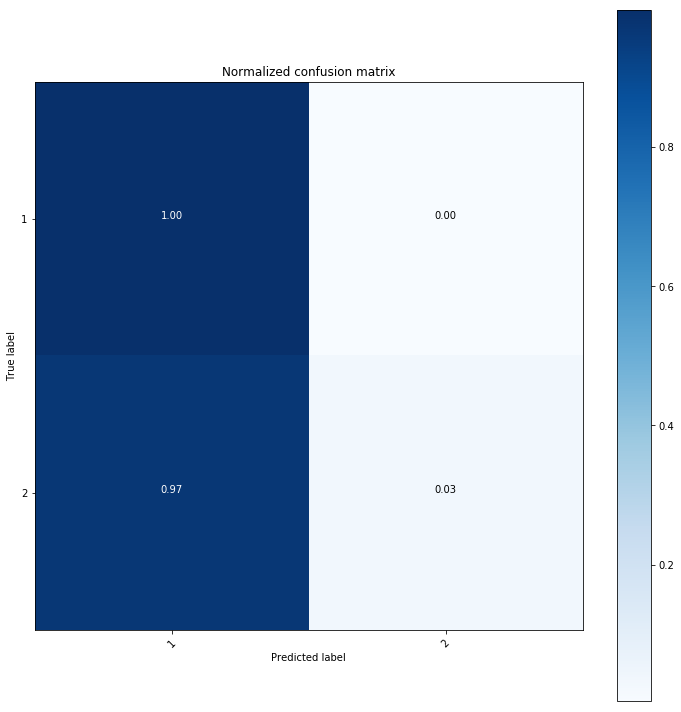

predicting 2 performance


100%|██████████| 792/792 [01:11<00:00, 11.12it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.76061776 0.23938224]
 [0.20512821 0.79487179]]


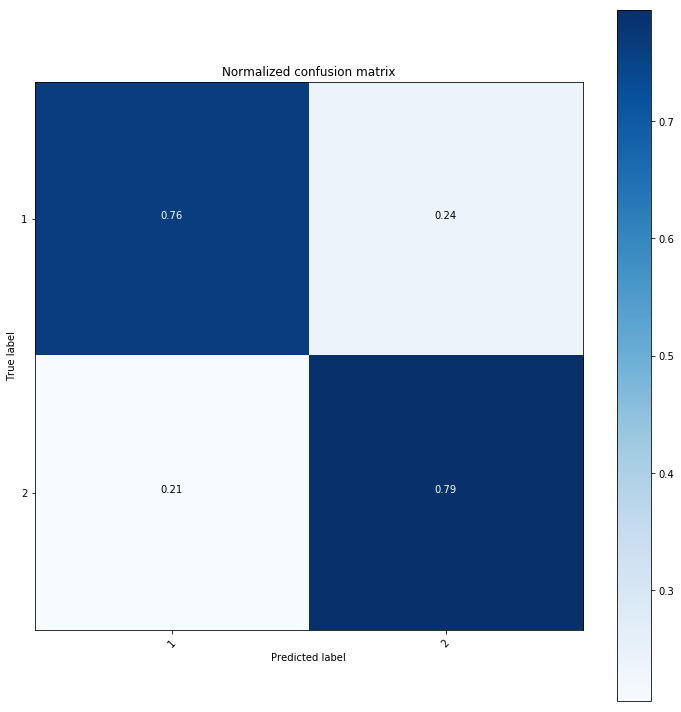

predicting 3 performance


100%|██████████| 792/792 [01:11<00:00, 11.10it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98841699 0.01158301]
 [0.00854701 0.99145299]]


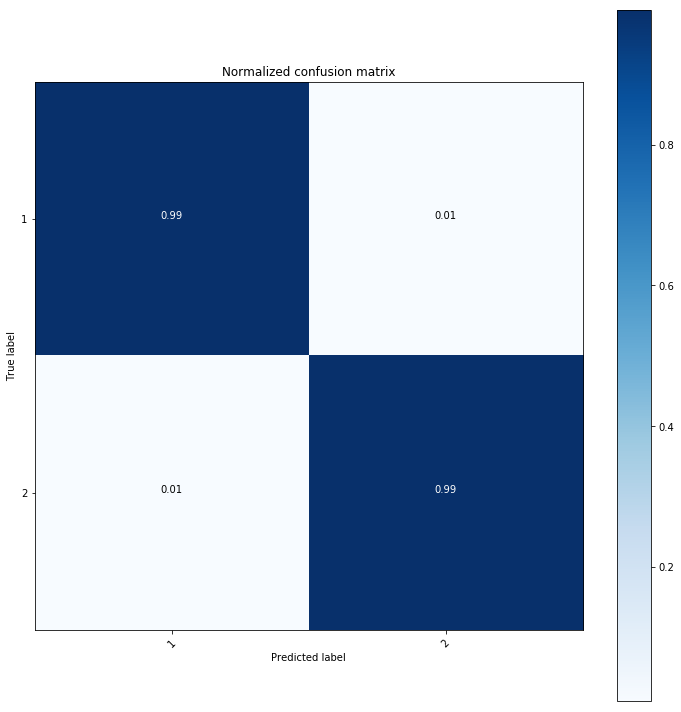

!!!!!!!!! test 8-th drumer !!!!!!!!!!!!
[[-0.19705277 -0.31813027 -0.27322706 ...  0.5108029  -0.40156262
  -1.31426121]
 [-0.17074135 -0.20398879 -0.1828708  ... -0.02587631  0.05929308
   0.68709441]
 [-0.27940354 -0.1006274  -0.28147559 ...  1.35492491  0.51005132
   1.13368271]
 ...
 [ 3.33129702 -0.2771689   3.58368691 ... -0.15782616  0.41297018
   0.78123556]
 [ 3.32858317 -0.3156993   3.51855151 ...  0.19534169 -0.38394346
  -0.12706456]
 [ 3.32914924 -0.34506393  3.56186025 ... -1.21482258 -1.53332598
   0.79557812]]


100%|██████████| 792/792 [01:11<00:00, 11.12it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 792/792 [01:11<00:00, 11.15it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.         1.        ]
 [0.01709402 0.98290598]]


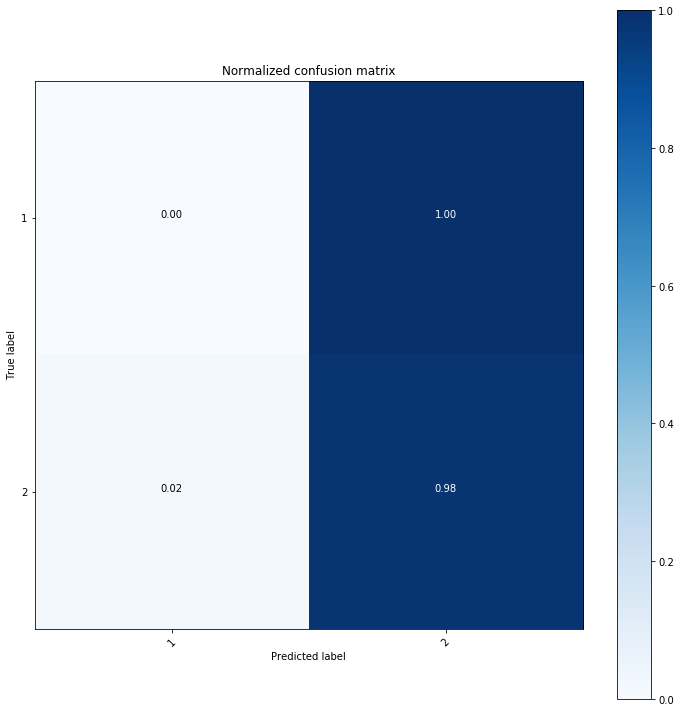

predicting 2 performance


100%|██████████| 792/792 [01:10<00:00, 11.17it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.74903475 0.25096525]
 [0.64102564 0.35897436]]


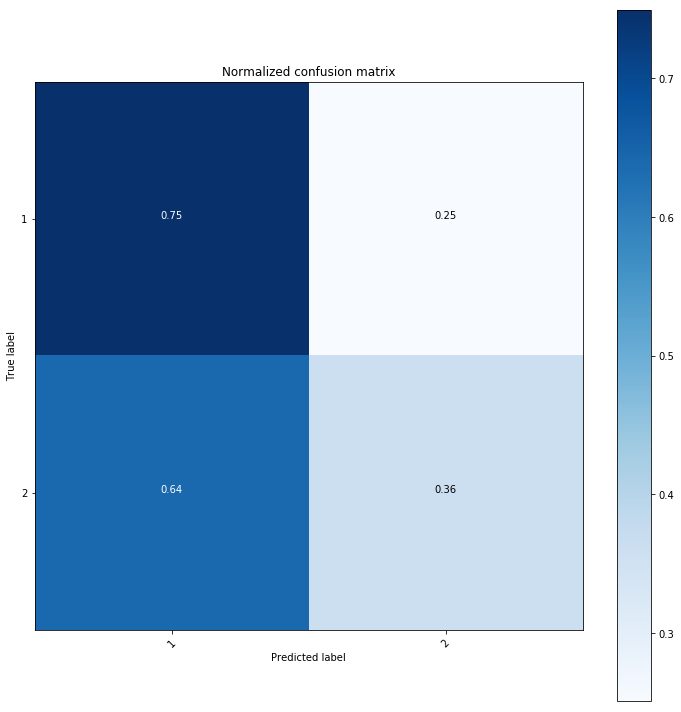

predicting 3 performance


100%|██████████| 792/792 [01:11<00:00, 11.14it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98841699 0.01158301]
 [0.06837607 0.93162393]]


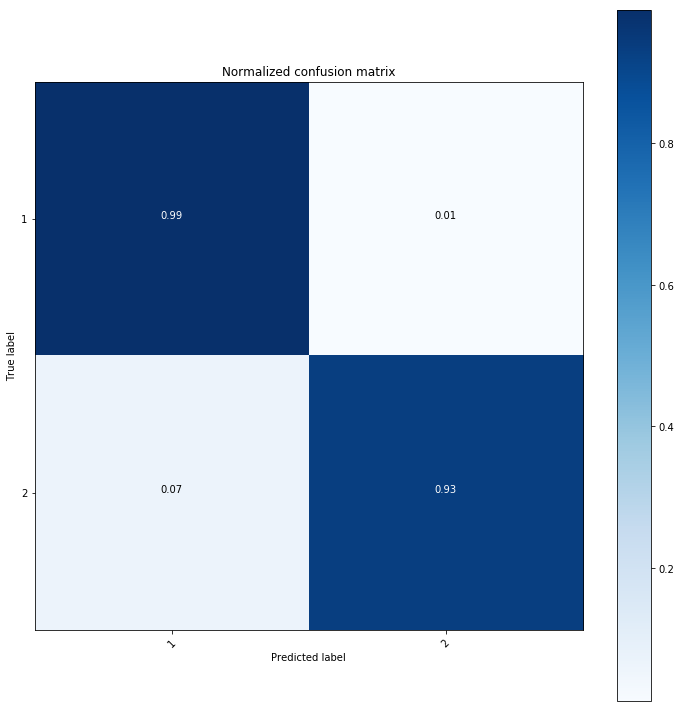

In [9]:
k = 50
C = 100

for drumer in range(1, 8 + 1):
    print('!!!!!!!!! test %d-th drumer !!!!!!!!!!!!' % drumer)
    model = Model(k_centroid=k, tolerance=C)
    model.fit(pfs[drumer - 1][TRAIN_ORDER - 1])
    print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
    for od in range(len(pfs[drumer - 1])):
        print('predicting %d performance' % (od + 1))
        pred_y, y = model.predict(pfs[drumer - 1][od])
        print('============ prediction arm ============')
        cutstom_output_cnf_matrix(y, pred_y)